In [37]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
solesensei_solesensei_bdd100k_path = kagglehub.dataset_download('solesensei/solesensei_bdd100k')

print('Data source import complete.')


Using Colab cache for faster access to the 'solesensei_bdd100k' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/8f7cabc7-07ba4411.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/b90b45ad-a54b1fbf.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/31547885-e8e7f4b3.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/051d6f8d-ab210000.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/2618ea7f-a67527bd.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/8676decc-9ecfdb8b.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/40f40ca7-96b25dd0.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/549458ac-ee760001.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/67d446b2-34892a52.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/3b6e9e4e-d9a2bf4b.jpg
/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k/images/10k/train/265

In [3]:
import json
import os

json_path = f"{solesensei_solesensei_bdd100k_path}/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json"

# Check if the file exists before trying to open it
if os.path.exists(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    print("Successfully loaded JSON data.")
    # You can print the first few items to verify
    # print(data[:5])
else:
    print(f"Error: JSON file not found at {json_path}")

Successfully loaded JSON data.


In [4]:
# Print the first 5 elements of the loaded JSON data
if 'data' in locals():
    print(data[:5])
else:
    print("JSON data variable 'data' not found. Please ensure the cell to load the JSON data has been run.")

[{'name': '0000f77c-6257be58.jpg', 'attributes': {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}, 'timestamp': 10000, 'labels': [{'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}, 'id': 0}, {'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': True, '

In [5]:
import cv2
import glob
import os
import shutil
import pandas as pd

In [6]:
# Load JSON file into a DataFrame
JSON_PATH_TRAIN = f"{solesensei_solesensei_bdd100k_path}/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json"
JSON_PATH_VAL = f"{solesensei_solesensei_bdd100k_path}/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json"

df_train = pd.read_json(JSON_PATH_TRAIN)
df_val = pd.read_json(JSON_PATH_VAL)

In [7]:
# Extract timeofday
df_train['timeofday'] = df_train['attributes'].apply(lambda x: x.get('timeofday', None))
df_val['timeofday']   = df_val['attributes'].apply(lambda x: x.get('timeofday', None))

# Extract weather
df_train['weather'] = df_train['attributes'].apply(lambda x: x.get('weather', None))
df_val['weather']   = df_val['attributes'].apply(lambda x: x.get('weather', None))

df_train[['name','timeofday','weather']].head()


,name,timeofday,weather
0,0000f77c-6257be58.jpg,daytime,clear
1,0000f77c-62c2a288.jpg,dawn/dusk,clear
2,0000f77c-cb820c98.jpg,dawn/dusk,clear
3,0001542f-5ce3cf52.jpg,night,clear
4,0001542f-7c670be8.jpg,night,clear


In [8]:
print("Train Time of Day Distribution:")
print(df_train['timeofday'].value_counts())

print("\nVal Time of Day Distribution:")
print(df_val['timeofday'].value_counts())

print("\nTrain Weather Distribution:")
print(df_train['weather'].value_counts())

print("\nVal Weather Distribution:")
print(df_val['weather'].value_counts())


Train Time of Day Distribution:
timeofday
daytime      36728
night        27971
dawn/dusk     5027
undefined      137
Name: count, dtype: int64

Val Time of Day Distribution:
timeofday
daytime      5258
night        3929
dawn/dusk     778
undefined      35
Name: count, dtype: int64

Train Weather Distribution:
weather
clear            37344
overcast          8770
undefined         8119
snowy             5549
rainy             5070
partly cloudy     4881
foggy              130
Name: count, dtype: int64

Val Weather Distribution:
weather
clear            5346
overcast         1239
undefined        1157
snowy             769
rainy             738
partly cloudy     738
foggy              13
Name: count, dtype: int64


In [9]:
ROOT = os.getcwd()

# Drop unused columns
val_labels = df_val.drop(["labels", "timestamp", "attributes"], axis=1, errors='ignore')
val_labels.to_csv(ROOT + "/val_labels.csv", index=False)

train_labels = df_train.drop(["labels", "timestamp", "attributes"], axis=1, errors='ignore')
train_labels.to_csv(ROOT + "/train_labels.csv", index=False)


In [10]:
timeofday_bias_ratio = df_train['timeofday'].value_counts(normalize=True)
weather_bias_ratio   = df_train['weather'].value_counts(normalize=True)

print("Bias Ratio - Time of Day:\n", timeofday_bias_ratio)
print("\nBias Ratio - Weather:\n", weather_bias_ratio)


Bias Ratio - Time of Day:
 timeofday
daytime      0.525715
night        0.400369
dawn/dusk    0.071955
undefined    0.001961
Name: proportion, dtype: float64

Bias Ratio - Weather:
 weather
clear            0.534532
overcast         0.125531
undefined        0.116213
snowy            0.079427
rainy            0.072571
partly cloudy    0.069865
foggy            0.001861
Name: proportion, dtype: float64


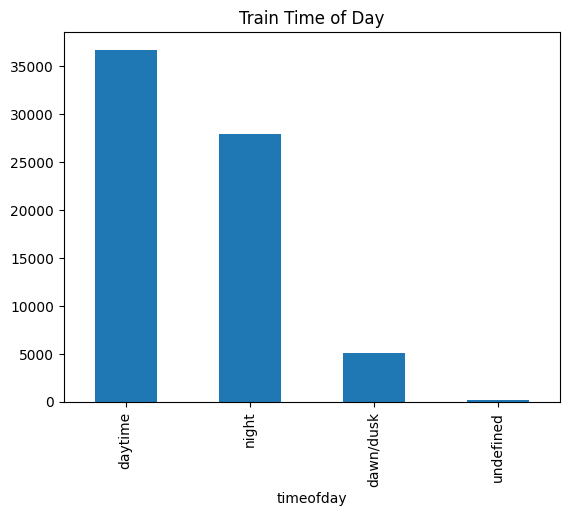

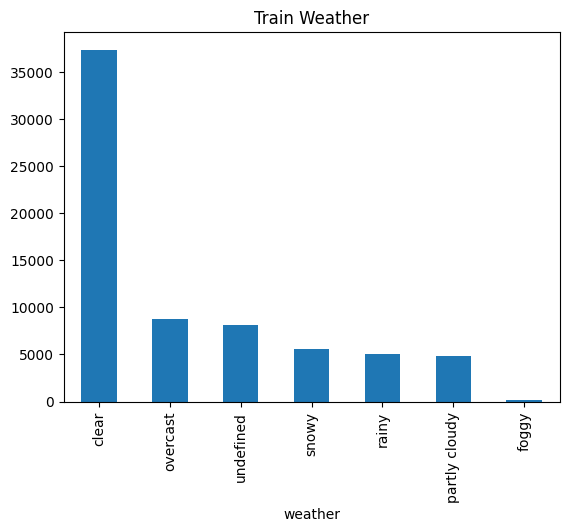

In [11]:
import matplotlib.pyplot as plt

# Time of day distribution
df_train['timeofday'].value_counts().plot(kind='bar', title='Train Time of Day')
plt.show()

# Weather distribution
df_train['weather'].value_counts().plot(kind='bar', title='Train Weather')
plt.show()


In [12]:

img_path = "images/train/*.jpg"
for path in glob.glob(img_path):
    img = cv2.imread(path)
    resized = cv2.resize(img, (512, 512))
    cv2.imwrite(path.replace("train", "train_resized"), resized)


In [13]:

json_path = f"{solesensei_solesensei_bdd100k_path}/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json"

with open(json_path) as f:
    data = json.load(f)

# Create the 'labels' directory if it doesn't exist
output_dir = "labels"
os.makedirs(output_dir, exist_ok=True)


for img in data:
    h, w = 720, 1280
    with open(f"{output_dir}/{img['name'].replace('.jpg', '.txt')}", "w") as f_out:
        for label in img["labels"]:
            if "box2d" in label:
                box = label["box2d"]
                x1, y1, x2, y2 = box["x1"], box["y1"], box["x2"], box["y2"]
                xc = (x1 + x2) / 2 / w
                yc = (y1 + y2) / 2 / h
                bw = (x2 - x1) / w
                bh = (y2 - y1) / h
                cls_id = 0 if label["category"] == "car" else 1
                f_out.write(f"{cls_id} {xc} {yc} {bw} {bh}\n")

In [14]:
df_train['timeofday_values'] = df_train['attributes'].apply(lambda x: x.get('timeofday', None))
df_val['timeofday_values'] = df_val['attributes'].apply(lambda x: x.get('timeofday', None))

=== BDD100K Dataset - Exploratory Data Analysis ===
Training samples: 69,863
Validation samples: 10,000
Total samples: 79,863

1. DATASET OVERVIEW
--------------------------------------------------
Training set size: 69,863 images
Validation set size: 10,000 images

2. ENVIRONMENTAL CONDITIONS ANALYSIS
--------------------------------------------------


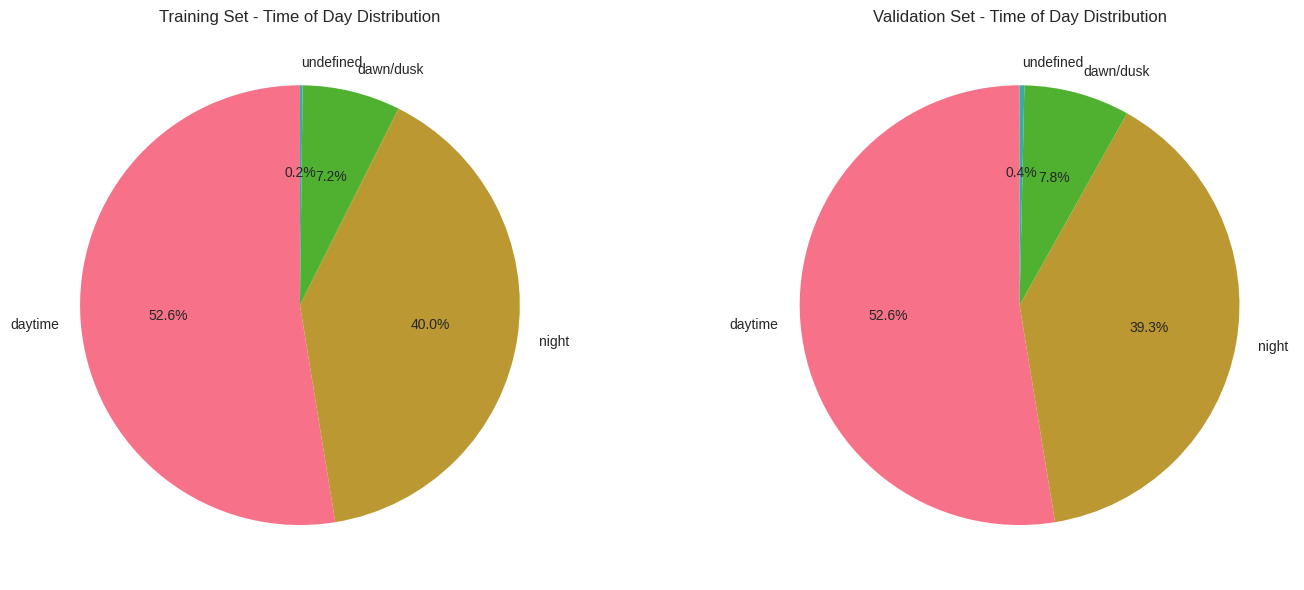

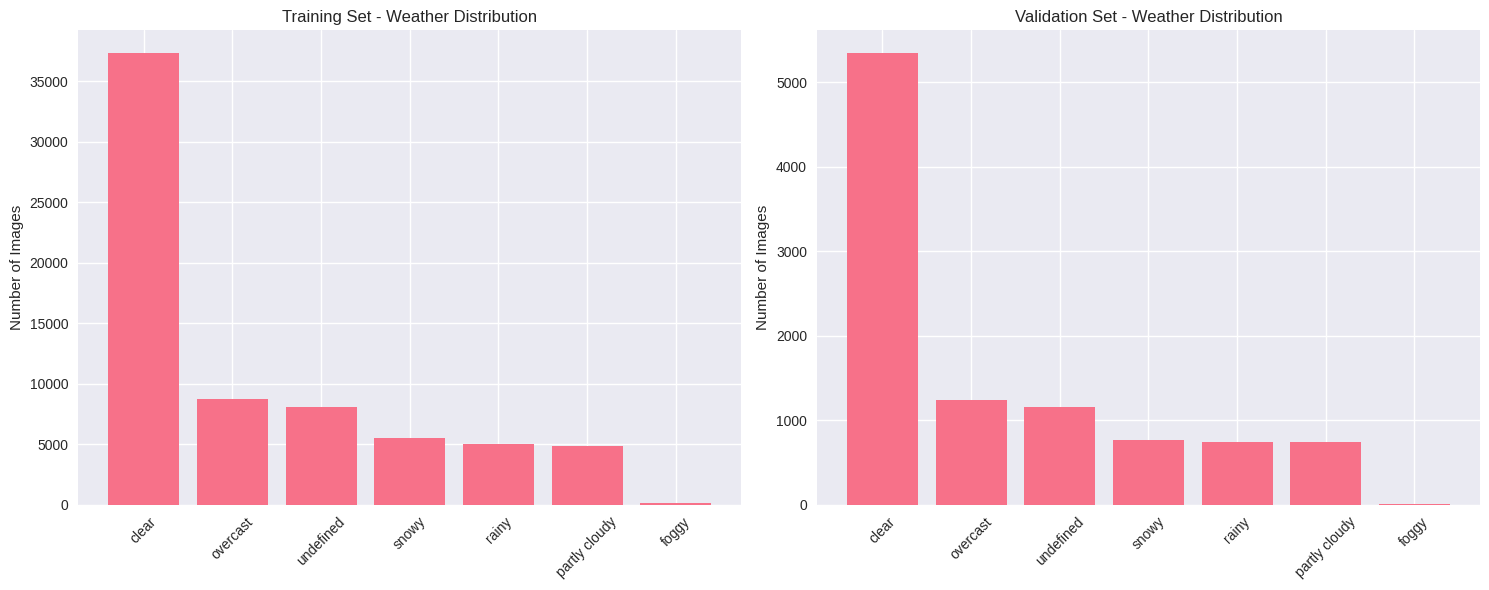


3. OBJECT CATEGORIES ANALYSIS
--------------------------------------------------
Total objects detected: 1,286,871
Unique object categories: 10

Top 15 Object Categories:
car                 :  713,211 (55.4%)
traffic sign        :  239,686 (18.6%)
traffic light       :  186,117 (14.5%)
person              :   91,349 (7.1%)
truck               :   29,971 (2.3%)
bus                 :   11,672 (0.9%)
bike                :    7,210 (0.6%)
rider               :    4,517 (0.4%)
motor               :    3,002 (0.2%)
train               :      136 (0.0%)


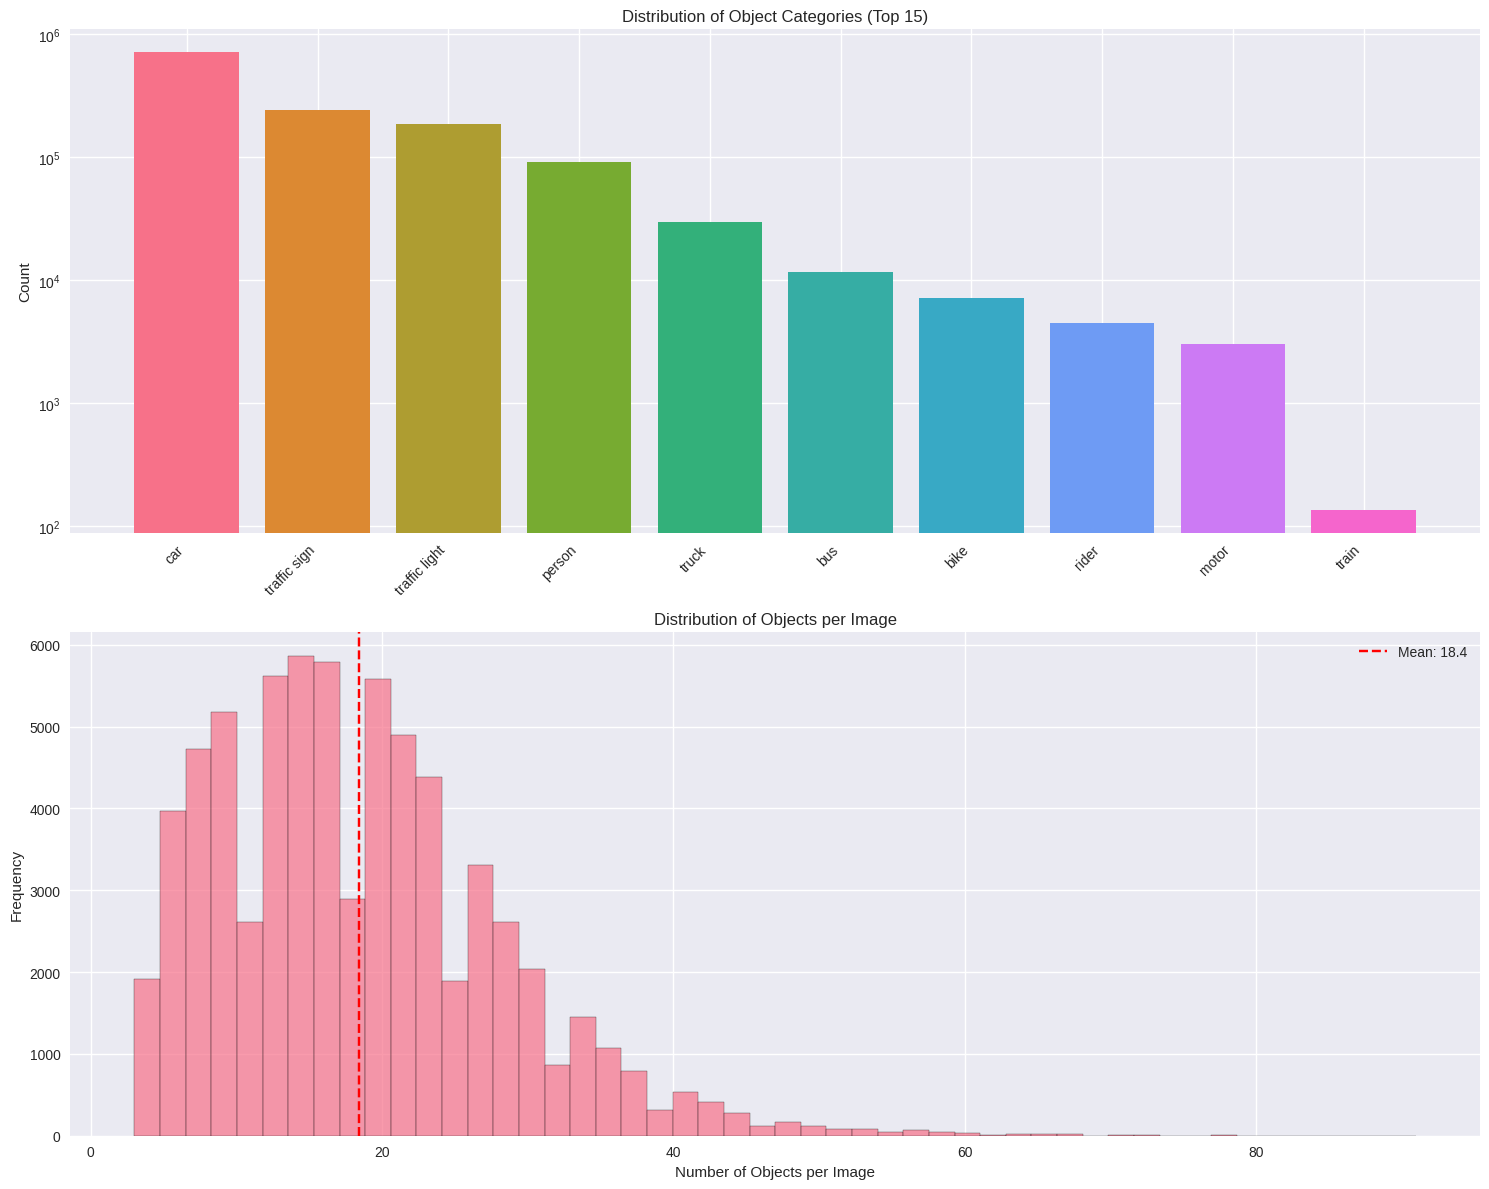


4. AUTONOMOUS DRIVING RELEVANT OBJECTS
--------------------------------------------------
Key objects for autonomous driving:
car            :  713,211 (55.42%)
truck          :   29,971 (2.33%)
bus            :   11,672 (0.91%)
person         :   91,349 (7.10%)
traffic light  :  186,117 (14.46%)
traffic sign   :  239,686 (18.63%)
bike           :    7,210 (0.56%)
motor          :    3,002 (0.23%)


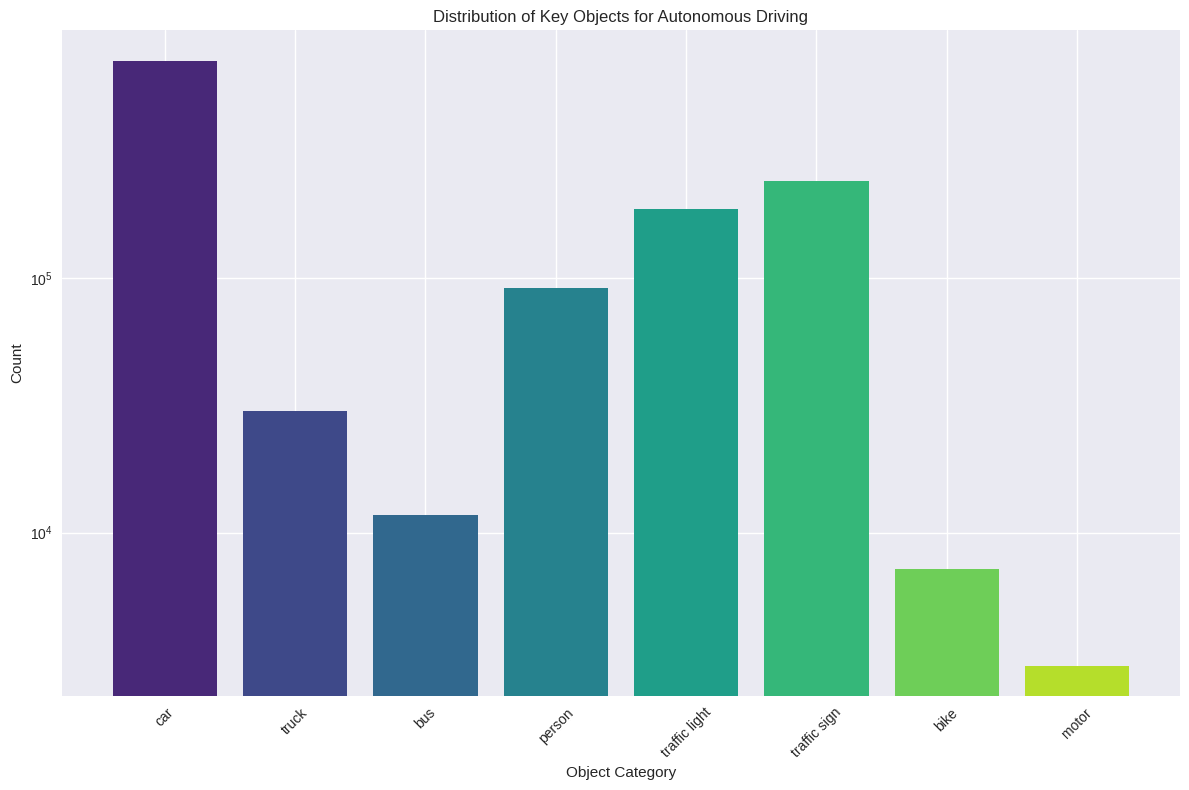


5. BOUNDING BOX ANALYSIS
--------------------------------------------------
Total bounding boxes: 1,286,871
Mean bounding box area: 6777 pixels²
Median bounding box area: 817 pixels²
Standard deviation: 22850 pixels²


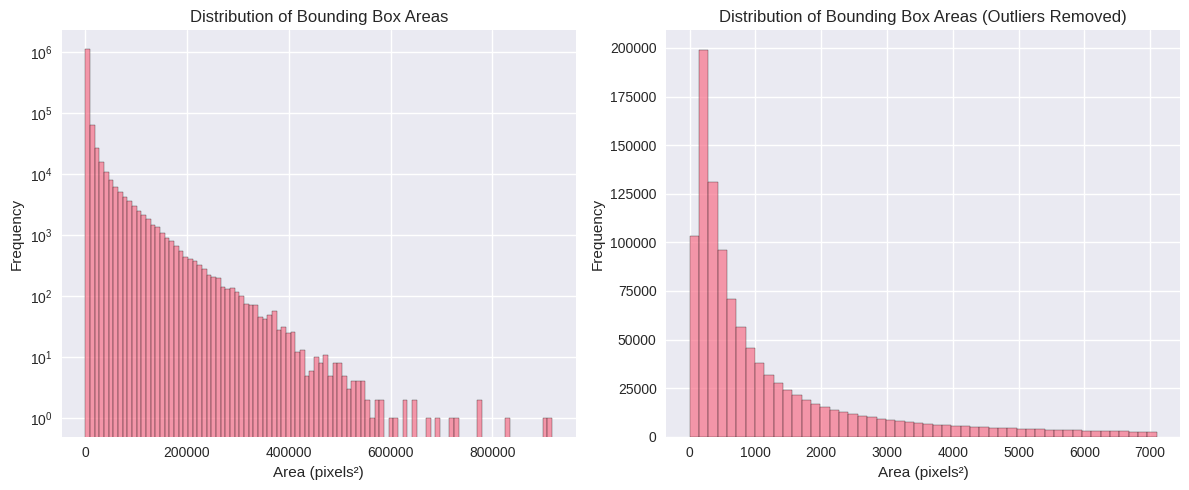


6. DATA QUALITY ASSESSMENT
--------------------------------------------------
Missing values in training set:
Series([], dtype: int64)

Missing values in validation set:
Series([], dtype: int64)

Undefined timeofday values in train: 137
Undefined weather values in train: 8119

7. SCENE ANALYSIS
--------------------------------------------------
Scene distribution:
city street    :   43,516 (62.3%)
highway        :   17,379 (24.9%)
residential    :    8,074 (11.6%)
parking lot    :      377 (0.5%)
undefined      :      361 (0.5%)
tunnel         :      129 (0.2%)
gas stations   :       27 (0.0%)


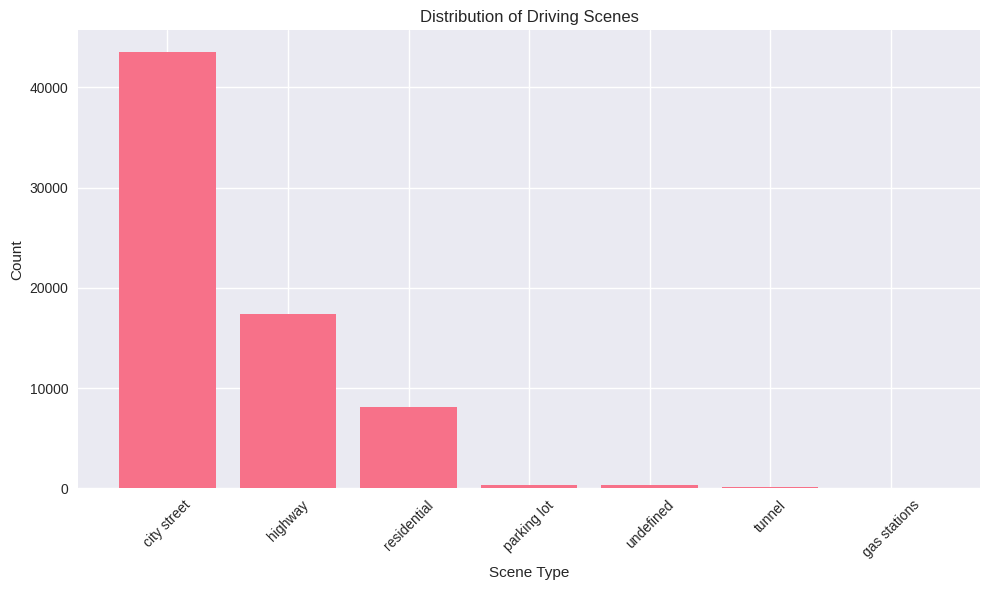


8. ENVIRONMENTAL CONDITIONS CORRELATION
--------------------------------------------------
Time of Day vs Weather Cross-tabulation:
weather    clear  foggy  overcast  partly cloudy  rainy  snowy  undefined
timeofday                                                                
dawn/dusk   2004     15      1147            570    328    436        527
daytime    12454     48      7551           4262   2522   2862       7029
night      22884     67        72             49   2208   2249        442
undefined      2      0         0              0     12      2        121


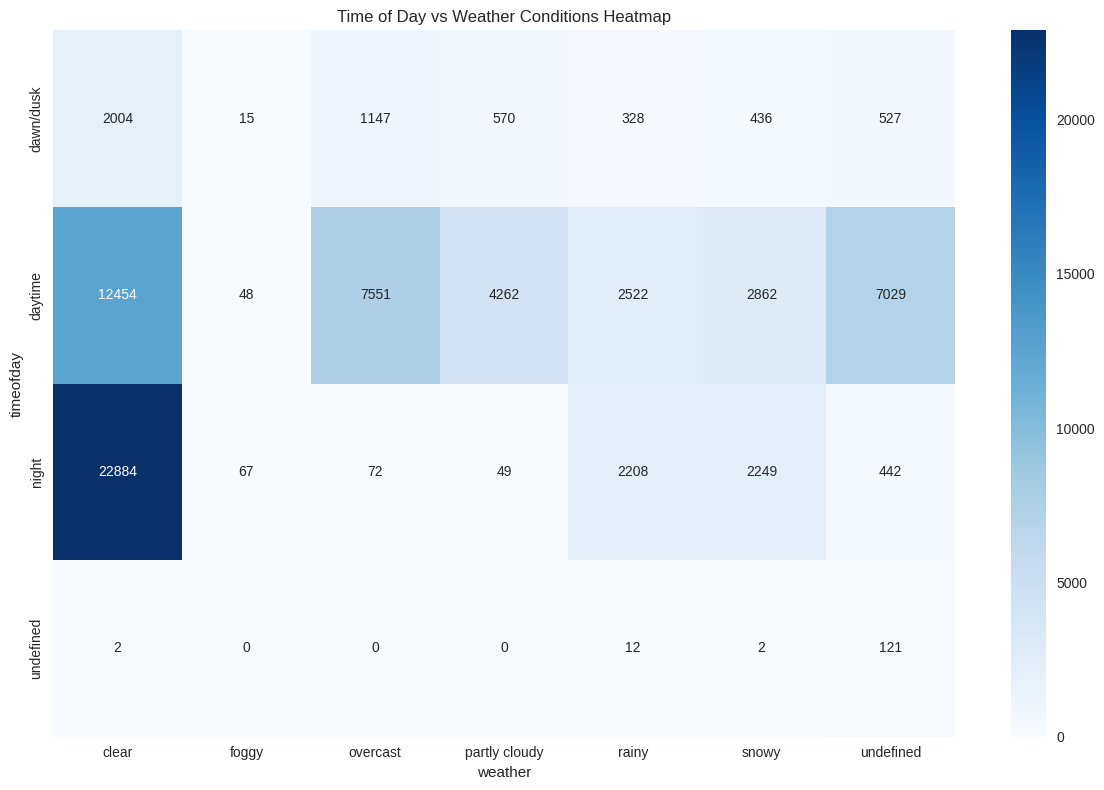


9. DATA IMBALANCE ANALYSIS
--------------------------------------------------
Class imbalance analysis for key objects:
car            :  713,211 (Ratio: 1.000)
traffic sign   :  239,686 (Ratio: 0.336)
traffic light  :  186,117 (Ratio: 0.261)
person         :   91,349 (Ratio: 0.128)
truck          :   29,971 (Ratio: 0.042)
bus            :   11,672 (Ratio: 0.016)
bike           :    7,210 (Ratio: 0.010)
motor          :    3,002 (Ratio: 0.004)

10. SUMMARY STATISTICS
--------------------------------------------------
Dataset Overview:
- Total images: 79,863
- Total objects: 1,286,871
- Average objects per image: 18.4
- Most common object: car (713,211 instances)
- Most common time: daytime (36,728 images)
- Most common weather: clear (37,344 images)

Dataset is ready for model training!
Key insights:
- Strong class imbalance (cars dominate)
- Diverse environmental conditions
- Good variety of autonomous driving scenarios
- May need data augmentation for rare classes


In [40]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
from tqdm import tqdm
import os

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the preprocessed data (assuming you've already run the earlier cells)
# df_train and df_val should be already loaded

print("=== BDD100K Dataset - Exploratory Data Analysis ===")
print(f"Training samples: {len(df_train):,}")
print(f"Validation samples: {len(df_val):,}")
print(f"Total samples: {len(df_train) + len(df_val):,}")

# 1. DATASET OVERVIEW
print("\n1. DATASET OVERVIEW")
print("-" * 50)

# Basic statistics
print(f"Training set size: {len(df_train):,} images")
print(f"Validation set size: {len(df_val):,} images")

# 2. ENVIRONMENTAL CONDITIONS ANALYSIS
print("\n2. ENVIRONMENTAL CONDITIONS ANALYSIS")
print("-" * 50)

# Time of day distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Train set time of day
train_timeofday = df_train['timeofday'].value_counts()
axes[0].pie(train_timeofday.values, labels=train_timeofday.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Training Set - Time of Day Distribution')

# Val set time of day
val_timeofday = df_val['timeofday'].value_counts()
axes[1].pie(val_timeofday.values, labels=val_timeofday.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Validation Set - Time of Day Distribution')

plt.tight_layout()
plt.show()

# Weather conditions distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Train set weather
train_weather = df_train['weather'].value_counts()
axes[0].bar(range(len(train_weather)), train_weather.values)
axes[0].set_xticks(range(len(train_weather)))
axes[0].set_xticklabels(train_weather.index, rotation=45)
axes[0].set_title('Training Set - Weather Distribution')
axes[0].set_ylabel('Number of Images')

# Val set weather
val_weather = df_val['weather'].value_counts()
axes[1].bar(range(len(val_weather)), val_weather.values)
axes[1].set_xticks(range(len(val_weather)))
axes[1].set_xticklabels(val_weather.index, rotation=45)
axes[1].set_title('Validation Set - Weather Distribution')
axes[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

# 3. OBJECT CATEGORIES ANALYSIS
print("\n3. OBJECT CATEGORIES ANALYSIS")
print("-" * 50)

# Extract all objects from training data
all_objects = []
objects_per_image = []
bbox_areas = []

for idx, row in df_train.iterrows():
    img_name = row['name']
    labels = data[idx]['labels']  # Using the original JSON data

    image_objects = []
    for label in labels:
        if 'box2d' in label:
            category = label['category']
            all_objects.append(category)
            image_objects.append(category)

            # Calculate bounding box area
            box = label['box2d']
            width = box['x2'] - box['x1']
            height = box['y2'] - box['y1']
            area = width * height
            bbox_areas.append(area)

    objects_per_image.append(len(image_objects))

# Object frequency analysis
object_counts = Counter(all_objects)
print(f"Total objects detected: {len(all_objects):,}")
print(f"Unique object categories: {len(object_counts)}")

# Top 15 most common objects
top_objects = object_counts.most_common(15)
print("\nTop 15 Object Categories:")
for obj, count in top_objects:
    print(f"{obj:20}: {count:8,} ({count/len(all_objects)*100:.1f}%)")

# Visualize object distribution
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Top objects bar chart
objects, counts = zip(*top_objects)
axes[0].bar(range(len(objects)), counts, color=sns.color_palette("husl", len(objects)))
axes[0].set_xticks(range(len(objects)))
axes[0].set_xticklabels(objects, rotation=45, ha='right')
axes[0].set_title('Distribution of Object Categories (Top 15)')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')  # Log scale due to large differences

# Objects per image distribution
axes[1].hist(objects_per_image, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Objects per Image')
axes[1].set_xlabel('Number of Objects per Image')
axes[1].set_ylabel('Frequency')
axes[1].axvline(np.mean(objects_per_image), color='red', linestyle='--',
                label=f'Mean: {np.mean(objects_per_image):.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# 4. AUTONOMOUS DRIVING RELEVANT OBJECTS
print("\n4. AUTONOMOUS DRIVING RELEVANT OBJECTS")
print("-" * 50)

# Define key objects for autonomous driving
key_objects = ['car', 'truck', 'bus', 'person', 'traffic light', 'traffic sign', 'bike', 'motor']
key_object_counts = {obj: object_counts.get(obj, 0) for obj in key_objects}

print("Key objects for autonomous driving:")
for obj, count in key_object_counts.items():
    if count > 0:
        print(f"{obj:15}: {count:8,} ({count/len(all_objects)*100:.2f}%)")

# Visualize key objects
plt.figure(figsize=(12, 8))
filtered_objects = {k: v for k, v in key_object_counts.items() if v > 0}
plt.bar(filtered_objects.keys(), filtered_objects.values(),
        color=sns.color_palette("viridis", len(filtered_objects)))
plt.title('Distribution of Key Objects for Autonomous Driving')
plt.xlabel('Object Category')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. BOUNDING BOX ANALYSIS
print("\n5. BOUNDING BOX ANALYSIS")
print("-" * 50)

print(f"Total bounding boxes: {len(bbox_areas):,}")
print(f"Mean bounding box area: {np.mean(bbox_areas):.0f} pixels²")
print(f"Median bounding box area: {np.median(bbox_areas):.0f} pixels²")
print(f"Standard deviation: {np.std(bbox_areas):.0f} pixels²")

# Bounding box size distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bbox_areas, bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bounding Box Areas')
plt.xlabel('Area (pixels²)')
plt.ylabel('Frequency')
plt.yscale('log')

plt.subplot(1, 2, 2)
# Remove outliers for better visualization
q75, q25 = np.percentile(bbox_areas, [75, 25])
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
filtered_areas = [area for area in bbox_areas if lower_bound <= area <= upper_bound]

plt.hist(filtered_areas, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bounding Box Areas (Outliers Removed)')
plt.xlabel('Area (pixels²)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 6. DATA QUALITY ASSESSMENT
print("\n6. DATA QUALITY ASSESSMENT")
print("-" * 50)

# Check for missing values
train_missing = df_train.isnull().sum()
val_missing = df_val.isnull().sum()

print("Missing values in training set:")
print(train_missing[train_missing > 0])
print("\nMissing values in validation set:")
print(val_missing[val_missing > 0])

# Check for 'undefined' values
train_undefined_time = (df_train['timeofday'] == 'undefined').sum()
train_undefined_weather = (df_train['weather'] == 'undefined').sum()

print(f"\nUndefined timeofday values in train: {train_undefined_time}")
print(f"Undefined weather values in train: {train_undefined_weather}")

# 7. SCENE ANALYSIS
print("\n7. SCENE ANALYSIS")
print("-" * 50)

# Extract scene information
scene_data = []
for idx, row in df_train.iterrows():
    attributes = data[idx]['attributes']
    scene_data.append(attributes.get('scene', 'unknown'))

scene_counts = Counter(scene_data)
print("Scene distribution:")
for scene, count in scene_counts.most_common():
    print(f"{scene:15}: {count:8,} ({count/len(scene_data)*100:.1f}%)")

# Visualize scene distribution
plt.figure(figsize=(10, 6))
scenes, counts = zip(*scene_counts.most_common())
plt.bar(scenes, counts)
plt.title('Distribution of Driving Scenes')
plt.xlabel('Scene Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. TIME OF DAY vs WEATHER CORRELATION
print("\n8. ENVIRONMENTAL CONDITIONS CORRELATION")
print("-" * 50)

# Create correlation matrix
env_data = []
for idx, row in df_train.iterrows():
    attributes = data[idx]['attributes']
    env_data.append({
        'timeofday': attributes.get('timeofday', 'unknown'),
        'weather': attributes.get('weather', 'unknown'),
        'scene': attributes.get('scene', 'unknown')
    })

env_df = pd.DataFrame(env_data)

# Cross-tabulation
time_weather_cross = pd.crosstab(env_df['timeofday'], env_df['weather'])
print("Time of Day vs Weather Cross-tabulation:")
print(time_weather_cross)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(time_weather_cross, annot=True, fmt='d', cmap='Blues')
plt.title('Time of Day vs Weather Conditions Heatmap')
plt.tight_layout()
plt.show()

# 9. DATA IMBALANCE ANALYSIS
print("\n9. DATA IMBALANCE ANALYSIS")
print("-" * 50)

# Calculate imbalance ratios
print("Class imbalance analysis for key objects:")
total_key_objects = sum(key_object_counts.values())
for obj, count in sorted(key_object_counts.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        ratio = count / max(key_object_counts.values())
        print(f"{obj:15}: {count:8,} (Ratio: {ratio:.3f})")

# 10. SUMMARY STATISTICS
print("\n10. SUMMARY STATISTICS")
print("-" * 50)
print(f"Dataset Overview:")
print(f"- Total images: {len(df_train) + len(df_val):,}")
print(f"- Total objects: {len(all_objects):,}")
print(f"- Average objects per image: {np.mean(objects_per_image):.1f}")
print(f"- Most common object: {object_counts.most_common(1)[0][0]} ({object_counts.most_common(1)[0][1]:,} instances)")
print(f"- Most common time: {train_timeofday.index[0]} ({train_timeofday.iloc[0]:,} images)")
print(f"- Most common weather: {train_weather.index[0]} ({train_weather.iloc[0]:,} images)")

print("\nDataset is ready for model training!")
print("Key insights:")
print("- Strong class imbalance (cars dominate)")
print("- Diverse environmental conditions")
print("- Good variety of autonomous driving scenarios")
print("- May need data augmentation for rare classes")